# Lecture 10 (Topics)
• Random Number Generation. Random numbers in R and the linear congruential generator.

• Simulation. 

• Simulating random variables using R base functions.

• The sample() function to simulate discrete random variables.

• Inverse transforms and the acceptance-rejection algorithm.

• Monte Carlo Integration. How to use simulation to approximate integrals

# Section 1: Random Number Generation

R实际上不产生真随机数，而是生成伪随机数，它与真随机数无法被区别。

随机数生成(Pseudorandom generators)： 产生一个确定性序列，我们不知道它是如何开始的，它与真实的随机序列是无法区分的。

In [1]:
# 在R中有许多生成随机数的方法，下面我们生成10个来自均匀分布的随机数：
runif(10)

[1] 0.8966695 0.4045080 0.7747348 0.8773961 0.6310011 0.9798270 0.7326886
 [8] 0.4335366 0.4998170 0.7681048

In [5]:
# 为了生成相同的随机数，使用函数set.seed()
set.seed(10)
runif(10)

set.seed(10)
runif(10)

[1] 0.50747820 0.30676851 0.42690767 0.69310208 0.08513597 0.22543662
 [7] 0.27453052 0.27230507 0.61582931 0.42967153

[1] 0.50747820 0.30676851 0.42690767 0.69310208 0.08513597 0.22543662
 [7] 0.27453052 0.27230507 0.61582931 0.42967153

# Linear Congruential Generator (LCG)
# 线性同余发生器

线性同余发生器是一个根据以下递归关系产生伪随机数序列的算法：
$$
X_{n} = (aX_{n-1}+c)\;mod\;m
$$

从[0,1]中模拟：
* 第一个数字是从seed中生成的，然后用它来生成第二个数字，以此类推。

* 取值总在0到m之间，每取m个值，序列便重启。

* 用它除以m则会给到分布在0到1之间的随机数（但很难取到1）

* LCG算法使得我们能够从单位区间内模拟伪随机数的生成。

In [9]:
# 简单的代码例子
seed <- 10
new.random <- function(a = 5, c = 12, m = 16){
    out <- (a*seed + c) %% m  # %% 是取余数的符号
    seed <<- out # <<-x相当于Python中的global
    return(out)
}

# 尝试：
out.length <- 20
variants <- rep(NA, out.length)
for(i in 1:out.length){
    variants[i] <- new.random()}
variants

# 线性同余发生器（LGC）将整数0,1,...,m洗牌并重新排列，但这个生成器只能给出4个整数的随机。

[1] 14  2  6 10 14  2  6 10 14  2  6 10 14  2  6 10 14  2  6 10

In [10]:
# 使用不同的参数，通过令c和m互质（只有公约数1），使得效果变好。
out.length <- 20
variants <- rep(NA, out.length)
for(i in 1:out.length){
    variants[i] <- new.random(a = 131, c = 7, m = 16)
}
variants

[1]  5  6  9  2 13 14  1 10  5  6  9  2 13 14  1 10  5  6  9  2

In [15]:
# 另一种尝试
out.length <- 20
variants <- rep(NA, out.length)
for(i in 1:out.length){
    variants[i] <- new.random(a = 129, c = 7, m = 16)
}
variants

[1]  9  0  7 14  5 12  3 10  1  8 15  6 13  4 11  2  9  0  7 14

In [13]:
# 我们实际上用的：

out.length <- 20
variants <- rep(NA, out.length)
for(i in 1:out.length){
    variants[i] <- new.random(a=1664545, c=1013904223,m=2^32)
}
variants/2^(32)

[1] 0.43922766 0.44363104 0.07163311 0.77667144 0.79330388 0.24633947
 [7] 0.37715676 0.63720967 0.39872085 0.03256257 0.10332505 0.43157231
[13] 0.77328557 0.86649406 0.59509342 0.01985155 0.02660193 0.34162454
[19] 0.66421420 0.66643640

# Simulating Random Variables

如果我们可以模拟在[0,1]上随机变量，那么我们实际上可以模拟任何随机变量。

## 模拟

一个随机模型可以给定某个具体随机变量Y的分布。它可能是复杂的、多元的，同时也具有许多独立项。我们关注Simulation是为了理解、检验、拟合模型。

### 理解模型:
• 模拟模型的结果，模拟模型的精确度。

• 模拟一个假设检验过程在原假设和备择假设下是如果表现的。过去的经验是否符合新的理论？

• 模拟样本分布和估计的变动幅度，假设模型是parametric，或者使用non-parametric的方法（例如bootstrap和permutation test）

## 检验模型:
• Cross-Validation.

• 从一个随机模型中模拟的数据需要看起来像真实数据。

## 拟合模型:
• Markov Chain Monte Carlo Methods (MCMC).

## Simulating from Probability Distributions
### 我们如何从概率分布中模拟？

• 常见的分布：使用内置的R函数(normal, gamma,
Poisson, binomial, etc..).

• 不常见的分布: 需要使用模拟。

• 离散随机变量: 通常使用sample()

• 连续随机变量：当CDF拥有反函数，可以使用Inverse Transform Method，或者acceptance-rejection method。


对于常见的随机变量，R有许多内置函数可以用作模拟。这些函数使得我们可以画出pdf，计算概率，计算分位数，从分布中模拟随机数。


### R Commands for Distributions

• dfoo 是foo的pdf或pmf

• pfoo 是foo的cdf

• qfoo 是foo的分位数函数（也是cdf的反函数）

• rfoo 从foo中生成随机数


[1] 0.3989423

[1] 0.3989423

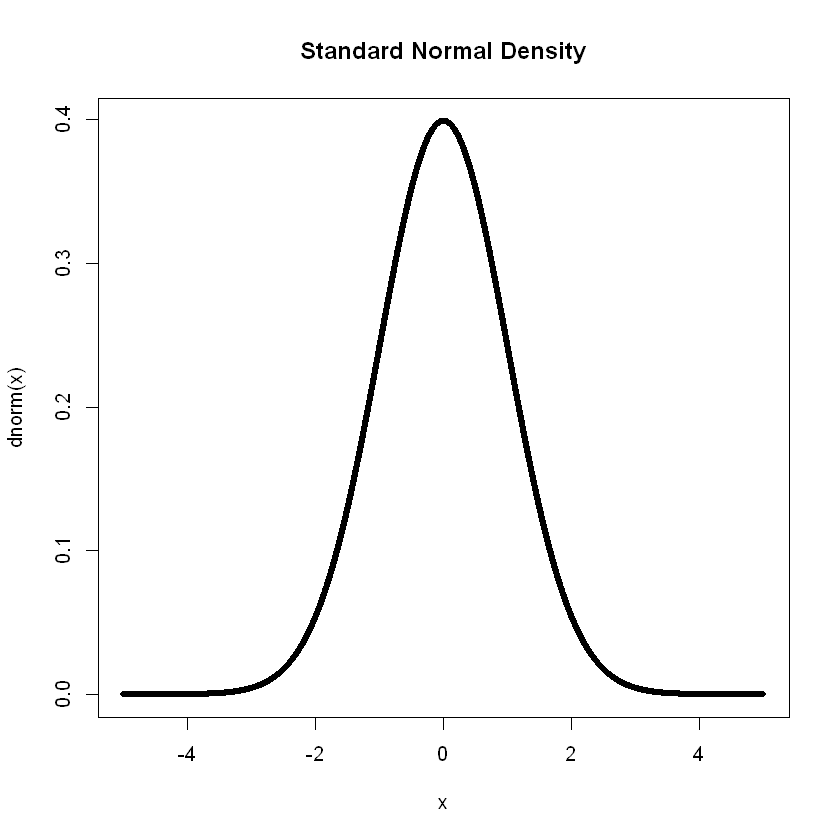

In [20]:
# 随便给几个例子：
dnorm(0, mean = 0, sd = 1) # Z在0处的取值
1/sqrt(2*pi)

# Normal Density
x <- seq(-5, 5, by = .001)
plot(x, dnorm(x), main="Standard Normal Density",pch=20)

In [21]:
# Normal CDF

pnorm(0) # P(Z < 0)
pnorm(1.96) - pnorm(-1.96) # P(-1.96 < Z < 1.96)

[1] 0.5

[1] 0.9500042

In [22]:
# Normal Quantiles

qnorm(.5) # P(Z < ?) = 0.5
qnorm(.975) # P(Z < ?) = 0.975

[1] 0

[1] 1.959964

In [24]:
# Draw Standard Normal RVs
rnorm(1)
rnorm(10, mean = 100, sd = 1)

[1] -2.185287

[1] 99.32513 97.88094 98.73480 99.62634 99.31244 99.12784 99.89824 99.74622
 [9] 98.14626 99.92205

## R Base Distributions Set 1

## R Base Distributions Set 2

In [26]:
# 学生-t分布 举例
# 画出学生t-分布在自由度为1, 2, 5, 30, 100下pdf, 使用不同类型的线区分自由度。
# 使用红色的线画出标准正态分布的pdf。

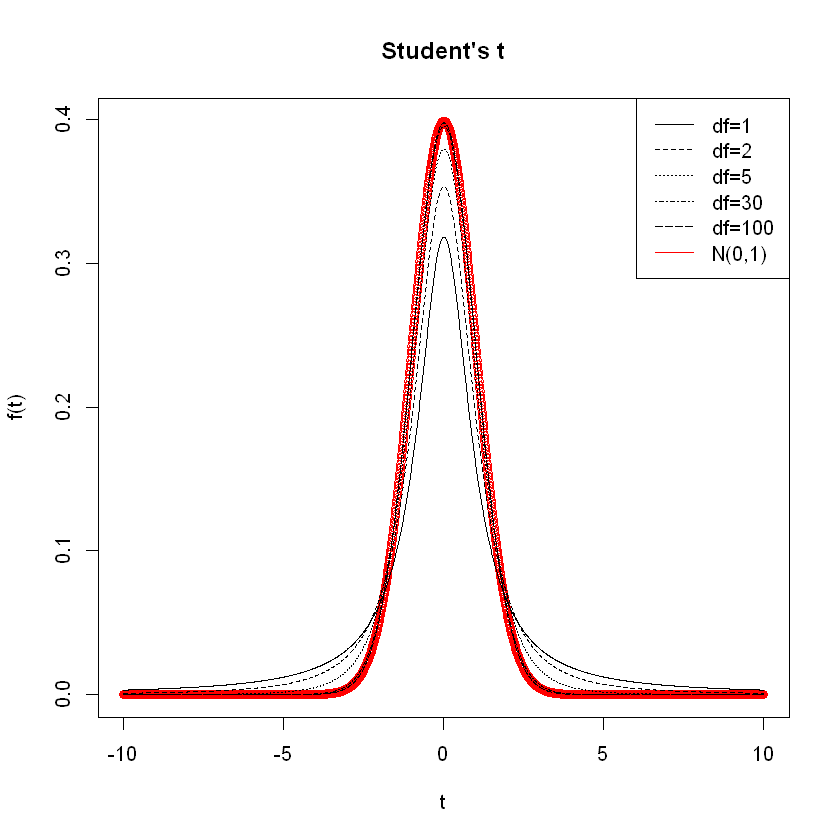

In [31]:
t <- seq(-10, 10, by = .01)
df <- c(1, 2, 5, 30, 100)
plot(t, dnorm(t), lty = 1, col = "red", ylab = "f(t)", main = "Student's t")
for(i in 1:5){
    lines(t, dt(t, df = df[i]), lty = i)
}
legend <- c(paste("df=", df, sep = ""), "N(0,1)")
legend("topright", legend = legend, lty = c(1:5, 1), col = c(rep(1, 5), 2))

## Check Yourself
伽马的概率密度函数：

$$
f(x|\alpha, \beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x},\;\qquad 0 < x < \infty,\; \alpha > 0,\; \beta > 0
$$
其中$\alpha$是shape parameter，$\beta$是scale parameter

对于$\alpha = 2$和$\beta = 1$计算：
$$
\int\limits^{\infty}_{2}f(x|\alpha, \beta)\;dx
$$

使用$\alpha = 2,3,4,5,6$画出pdf

In [29]:
# 计算上述积分：
1-pgamma(2, shape = 2, scale = 1)

[1] 0.4060058

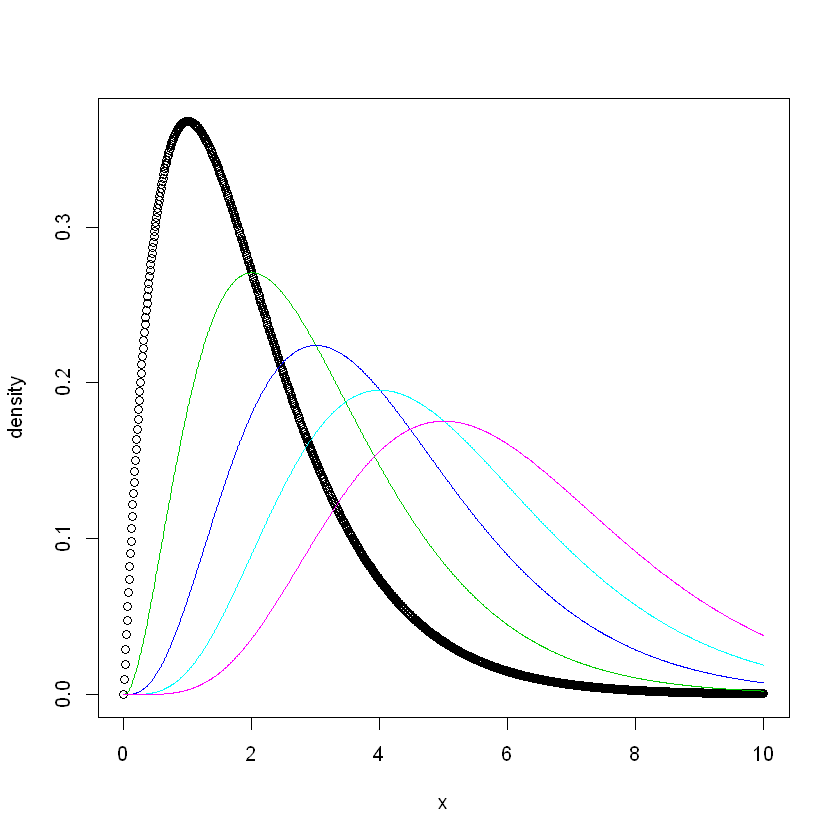

In [37]:
# 画图：
xint <- seq(0,10, by=0.01)
plot(xint, dgamma(xint, shape = 2, scale = 1), lty = 1, xlab="x", ylab="density")
for(i in 3:6){
    lines(xint, dgamma(xint, shape = i, scale = 1), col = i)
}

## Discrete random variables: Often can use sample()

the sample() function to sample from

1. The discrete uniform distribution.
2. Uncommon discrete distributions (by specifying the probabilities)


Template: sample(x, size, replace = FALSE, prob = NULL)

In [38]:
# Example
# 从以下离散分布生成随机变量：
# When x = 1,2,3; f(x) = 0.1, 0.2, 0.7 respectively.
n <- 1000
p <- c(0.1, 0.2, 0.7)
x <- sample(1:3, size = n, prob=p, replace = TRUE)
head(x,10)

[1] 2 2 3 3 3 3 3 3 3 3

In [39]:
rbind(p, p.hat = table(x)/n)

,1,2,3
p,0.100,0.200,0.700
p.hat,0.106,0.219,0.675


## Discrete random variables: Often can use sample()

使用Inverse Transform Method (if CDF is invertible) OR Accpetance-Rejection Method

# Theorem Induction:

In [40]:
?pbeta
